# Drawing $\operatorname{Spec} \mathcal O_F$

First, ensure that `pytikz`, https://github.com/allefeld/pytikz, is installed:

In [1]:
%%capture
pip install git+https://github.com/allefeld/pytikz.git

Now load the main file:

In [2]:
load("drawspec.sage")

This file provides a simple python class called `NumberFieldSpec`. One can also use the function `draw_spec`, which returns a `pytikz` `Pic` object.

In [3]:
F = QuadraticField(42)
spec = NumberFieldSpec(F,nprimes=6)


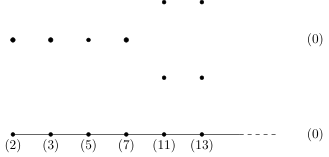

In [4]:
spec.demo()

 If we want to change the number of primes in the picture, we can update the prime count using the method `set_nprimes`.

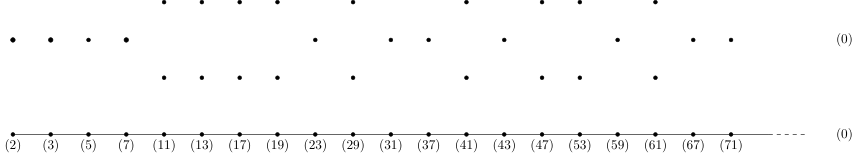

In [5]:
spec.set_nprimes(20)
spec.pic()

As the previous code block shows, we can display the picture in `jupyter` by returning the associated `Pic` object. This does not seem to work in the terminal, where running `spec.write_image("filename.pdf")` is the easiest way to see the result.

## Colours of ideal classes
Note that $\mathbb Q(\sqrt{42})$ has class number 2: 

In [6]:
F.class_number()

2

By setting the flag `color_classes` to `True`, we can colour the non-principal ideals. 

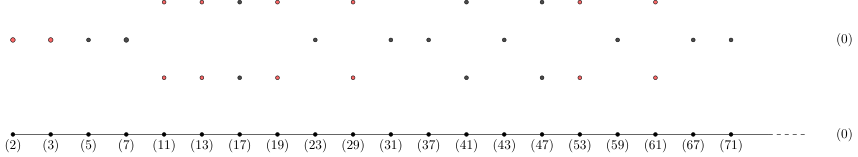

In [7]:
spec.color_classes(True)
spec.pic()

Generally, this assigns a colour to each nontrivial class in the class group, and colours the corresponding primes.

The colours are chosen at random, and a new colour scheme is generated every time the function runs. This uses a code snippet from https://gist.github.com/adewes/5884820. 

**TODO:**
- allow the user to pick colour schemes manually
- enable reproducibility by setting random seed as described in the comments of  https://gist.github.com/adewes/5884820

## Ramified primes
By default, the ramified primes are drawn fatter than the remaining primes, and the factor can be changed through the method `fat_ramify`:

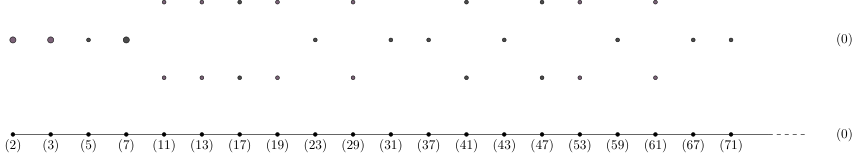

In [8]:
spec.fat_ramify(3)
spec.pic()

## Higher-degree number fields
The script works equally well for number fields of higher degree, but some tweaking might be necessary to get a pretty result.

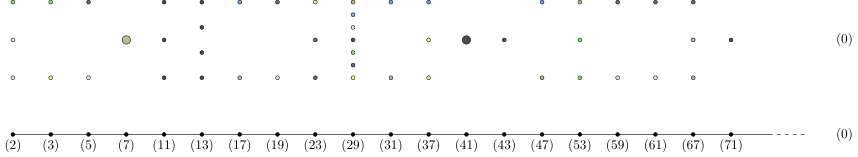

In [9]:
K.<a> = NumberField(x^7 + 41) # class number is 7
specK = NumberFieldSpec(K, nprimes=20)
specK.color_classes(True)
specK.pic()

## $\operatorname{Spec} \mathcal O_F$ as a curve over $\operatorname{Spec} \mathbb Z$
In my undergrad thesis, I made this picture in `tikz` (https://users.ox.ac.uk/~quee4127/etale.pdf#page=24) of $\operatorname{Spec} \mathbb Z[i]$:
<img src="specZi.png" alt="drawing" width="400"/>

The point of the vertical lines (in retrospect more confusing than anything else!) is to emphasize that we are looking at fibres over the primes of $\mathbb Z$, and the curves allude to the idea that $\operatorname{Spec} \mathcal O_F$ is in a sense a curve over $\operatorname{Spec} \mathbb Z$. 

We can draw curves like this using the `curve` method:

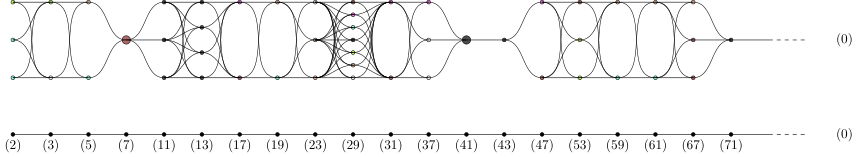

In [10]:
specK.curve(True)
specK.pic()

Note that `jupyter` respects the width of the window, so we can look at many, many primes by scrolling:

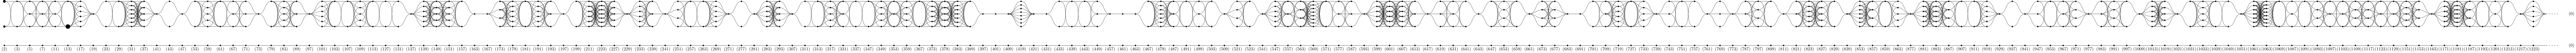

In [11]:
spec = NumberFieldSpec(NumberField(x^14 - 2*x^13 + 13*x^12 - 52*x^11 + 104*x^10 - 364*x^9 + 806*x^8 - 1300*x^7 + 2990*x^6 - 4212*x^5 + 4680*x^4 - 7020*x^3 + 5265*x^2 - 1802*x + 445,"a"))
spec.curve(True)
spec.set_nprimes(200)
# spec.color_classes(True) # this makes it quite slow!
spec.pic()